## Advantage of Decision Trees
- Compared to other algorithms decision trees requires less effort for data preparation during pre-processing.
- A decision tree does not require normalization of data.
- A decision tree does not require scaling of data as well.
- Missing values in the data also do NOT affect the process of building a decision tree to any considerable extent.
- A Decision tree model is very intuitive and easy to explain to technical teams as well as stakeholders.

## Disadvantage of Decision Trees
- A small change in the data can cause a large change in the structure of the decision tree causing instability.
- For a Decision tree sometimes calculation can go far more complex compared to other algorithms.
- Decision tree often involves higher time to train the model.
- Decision tree training is relatively expensive as the complexity and time has taken are more.
- The Decision Tree algorithm is inadequate for applying regression and predicting continuous values.

---

## Impurity and Gini-Index
Impurity is a measure of homogeneity of data. Data is said to be pure or homogenous if it only contains a single class. The more the classes in the data, the more impure it is. Each node in the decision tree, except the leaf nodes, contains data which has a potential of splitting into further groups In Mathematics Impurity Lies Between 0 and 1.

More Gini Index = More Impure Class(1 Impure Class)

Less Gini Index = More Pure Class

Gini Index = 0(Pure class) i.e. Its a Leaf node and further Can't be Split.

0 , 0.2, 0.3, 0.4, 0.5, ............, 1

## Entropy

Entropy is an information theory metric that measures the impurity or uncertainty in a group of observations. It determines how a decision tree chooses to split data. 

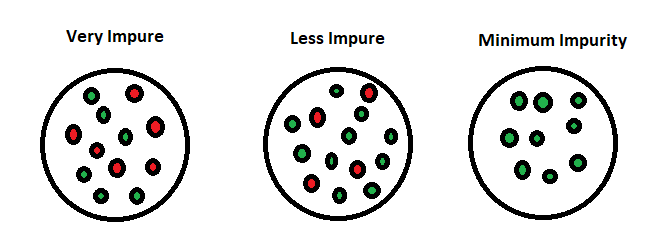

## Entropy Formula
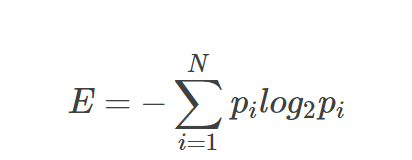

pi is the probability of randomly selecting an example in class i. Let’s have an example to better our understanding of entropy and its calculation. Let’s have a dataset made up of three colors; red, purple, and yellow. If we have one red, three purple, and four yellow observations in our set, our equation becomes:

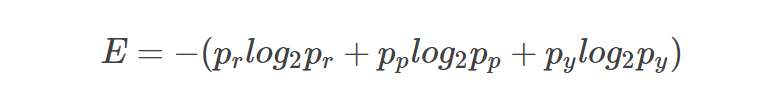

Where pr, pp and py are the probabilities of choosing a red, purple and yellow example respectively. We have pr=18 because only 18 of the dataset represents red. 38 of the dataset is purple hence pp=38. Finally, py=48 since half the dataset is yellow. As such, we can represent py as py=12. Our equation now becomes:

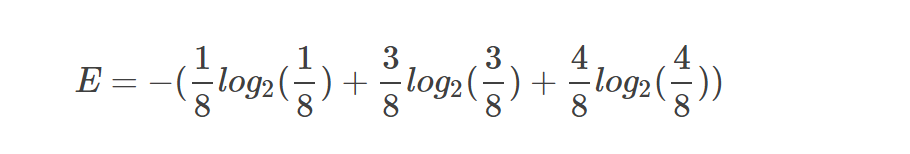

Our Entropy becomes 1.41

You might wonder, what happens when all observations belong to the same class? In such a case, the entropy will always be zero.

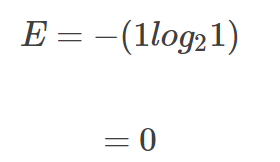


However, if we have a dataset with say, two classes, half made up of yellow and the other half being purple, the entropy will be one.

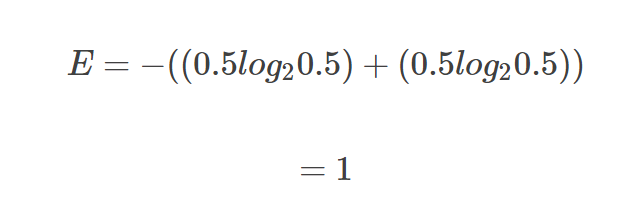E=−((0.5log20.5)+(0.5log20.5))


## Parameters

#### min_sample_leaf
This is the minimum no. of sample required to be a leaf node. For example, if a node contains 5 samples, it can be split into two leaf nodes of size 2 and 3 respectively. Now suppose you have min_sample_leaf = 3, then the split will not occur, because the minimum leaf size if 3, and you can't have a new node with only 2 samples.

#### max_depth

Each decision tree has a maximum number of levels permitted. max_depth represents this number.



#### min_samples_split
The minimum number of samples required to split an internal node:



## CART ALGORITHM

1. Select root node based on lowest Gini-Index and highest Information Gain
2. On each iteration of an algorithms it calculate the Gini Index and Information gain, considering that every node is unused
3. Select node base on Lowest Gini Index or Highest I.G
4. then Splits set S to produce the subsets of data
5. An algorithms continuous to recur on each subset and make sure that attributes are fresh and Creates the decision Tree

## Decision Tree Algorithm

In [67]:
import pandas as pd
import numpy as np

In [80]:
df=pd.read_csv('diabetes.csv')

In [81]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [83]:
# convert to int
df['BMI']= df['BMI'].astype(int)
df['DiabetesPedigreeFunction']= df['DiabetesPedigreeFunction'].astype(int)

In [84]:
X=df.drop('Outcome',axis=1)

In [85]:
y=df[['Outcome']]

In [86]:
## Split Training and Test Data

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Model

In [89]:
# Import
from sklearn.tree import DecisionTreeClassifier


In [90]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [91]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [92]:
from sklearn.tree import export_graphviz

export_graphviz(
        dtc,
        out_file="iris_tree.dot",
        feature_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

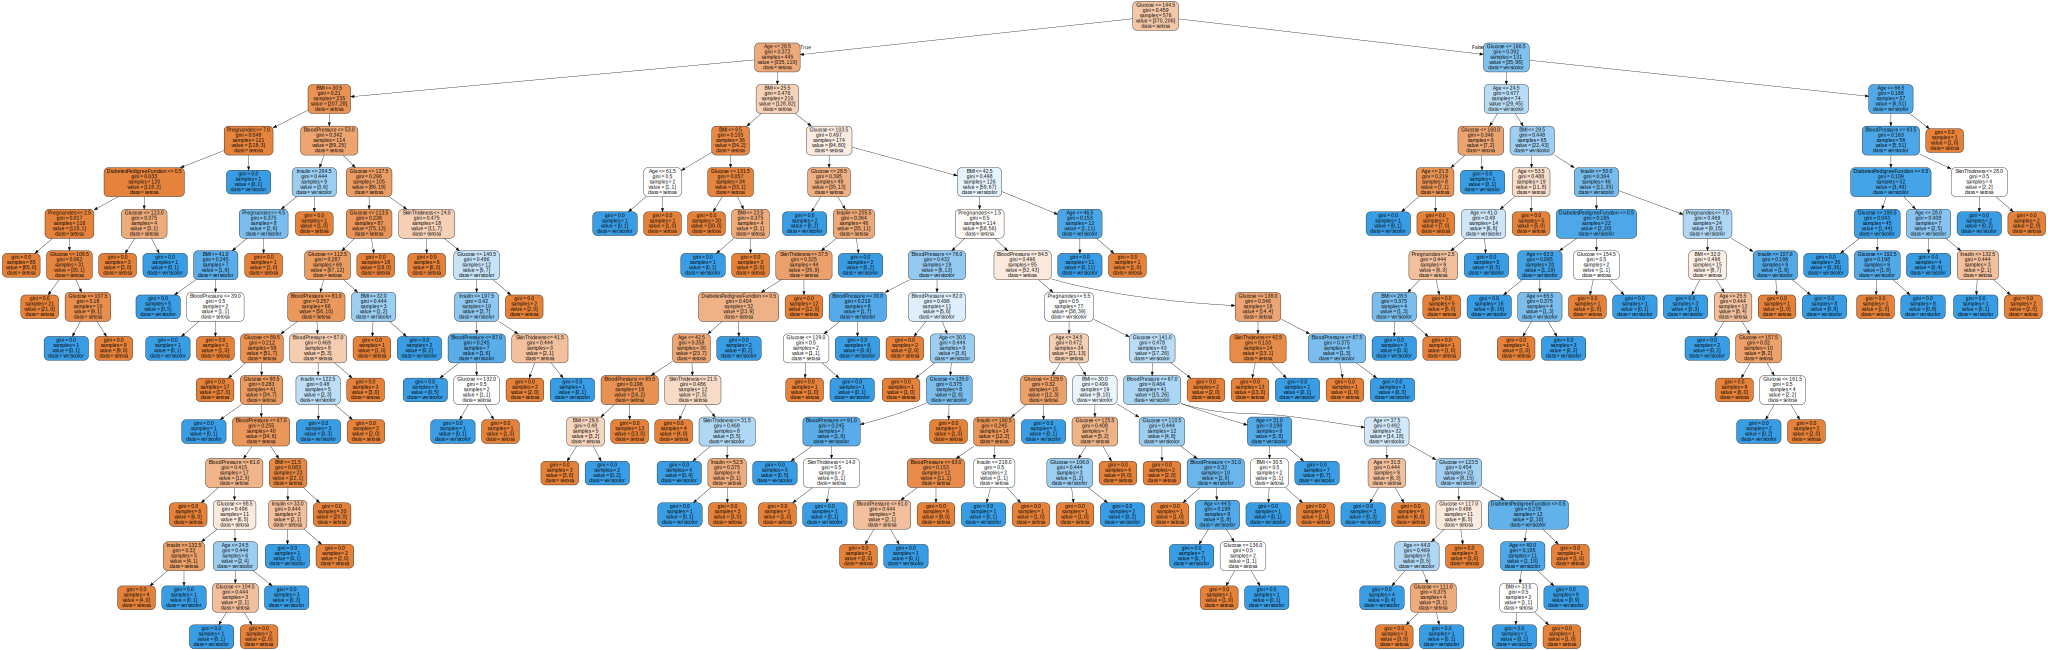

In [93]:
from graphviz import Source

Source.from_file("iris_tree.dot")

In [94]:
## Prediction

y_pred = dtc.predict(X_test)

In [95]:
from sklearn.metrics import classification_report

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       130
           1       0.53      0.63      0.58        62

    accuracy                           0.70       192
   macro avg       0.67      0.68      0.67       192
weighted avg       0.72      0.70      0.71       192



## Dealing with overfitting

### min_samples_split

example: default min_samples_split=2
This means if you've 1 sample left in a node, you cannot split further.When it gets really deep in depth, it overfits your data
If you increase your min_samples_split value,You would decrease the depth of your tree
This is because you would run out of samples to split,This would reduce overfitting

## Area Under the Curve


In [97]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


0.6837468982630273

## Hyperparameter Tuning

In [101]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [111]:
grid_search = GridSearchCV(estimator=dtc, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [112]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=1.0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [113]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004911,0.001304,0.002882,0.003433,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.694444,0.756944,0.729167,0.729167,0.727431,0.022165,26
1,0.002652,0.000000,0.003253,0.000217,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.701389,0.756944,0.729167,0.729167,0.729167,0.019642,22
2,0.002566,0.002566,0.002306,0.002335,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.701389,0.756944,0.729167,0.729167,0.729167,0.019642,22
3,0.002825,0.002335,0.001006,0.001743,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.701389,0.756944,0.736111,0.722222,0.729167,0.020246,21
4,0.003165,0.001840,0.001630,0.001484,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.701389,0.722222,0.736111,0.701389,0.715278,0.014731,37


In [114]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50)

In [115]:
dtc = DecisionTreeClassifier(max_depth=5, min_samples_leaf=50,random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, random_state=42)

In [116]:
y_pred = dtc.predict(X_test)

In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       130
           1       0.67      0.56      0.61        62

    accuracy                           0.77       192
   macro avg       0.74      0.72      0.73       192
weighted avg       0.76      0.77      0.77       192



So, should you use Gini impurity or entropy? The truth is, most of the time it does not make a big difference: they lead to similar trees. Gini impurity is slightly faster to compute, so it is a good default. However, when they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce slightly more balanced trees

## Links
- https://www.linkedin.com/pulse/decision-tree-cart-algorithms-mathematics-all-behind-algorithm-patel/
- https://www.section.io/engineering-education/entropy-information-gain-machine-learning/
- https://www.ritchieng.com/machine-learning-decision-trees/